# 2018 USA Lightning Strikes

Written by: Gabriela Novo de Oliveira

## 1. Overview

In this notebook, I examined 2018 lightning strike data collected by the National Oceanic and Atmospheric Administration (NOAA).

To complete this notebook, I will:

* Find days of the week with most strikes in 2018.
* Calculate the total number of strikes for each month in 2018 and plot them on a bar graph.
* Find the locations with the greatest number of strikes within a single day in 2018.
* Examine the locations that had the greatest number of days with at least one lightning strike in 2018.
* Determine whether certain days of the week had more lightning strikes than others and plot the results on a box-plot.
* Calculate the number of weekly lightning strikes in 2018 and plot them on a bar graph.
* Perform input validation to inspect the data and validate the quality of its contents, checking for null values, missing dates, a plausible range of daily lightning strikes in a location, and a geographical range that aligns with expectation. 

I will be using pandas, numpy, and datetime for operations, and matplotlib, pyplot, seaborn and plotly for plotting.

## 2. Importing packages, libraries and the data

Importing all the required libraries and extensions.

In [2]:
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px 

In [22]:
# Reading the 2018 lightning strike dataset.
df = pd.read_csv('2018_usa_lightning_data.csv')

## 3. Data Analysis

In [11]:
# Inspecting the first 10 rows.
df.head(10)

date  number_of_strikes center_point_geom
0  2018-01-03                194     POINT(-75 27)
1  2018-01-03                 41   POINT(-78.4 29)
2  2018-01-03                 33   POINT(-73.9 27)
3  2018-01-03                 38   POINT(-73.8 27)
4  2018-01-03                 92     POINT(-79 28)
5  2018-01-03                119     POINT(-78 28)
6  2018-01-03                 35   POINT(-79.3 28)
7  2018-01-03                 60   POINT(-79.1 28)
8  2018-01-03                 41   POINT(-78.7 28)
9  2018-01-03                119   POINT(-78.6 28)

The data is structured as one row per day along with the geometric location of the strike. 

In [12]:
df.shape

(3401012, 3)

In [8]:
df.drop_duplicates().shape

(3401012, 3)

The total number of rows is 3,401,012, and there are three columns. There are no duplicated observations in the data.

In [6]:
# Getting more information about the data, including data types of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3401012 entries, 0 to 3401011
Data columns (total 3 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   date               object
 1   number_of_strikes  int64 
 2   center_point_geom  object
dtypes: int64(1), object(2)
memory usage: 77.8+ MB


### 3.1. Converting the date column to datetime

The `date` column is an 'object' type rather than a 'date' type. Objects are strings. When dates are encoded as strings, they cannot be manipulated as easily. Converting string dates to datetime enables us to work with them much more easily.

Converting to datetime using the pandas function `to_datetime()`.

In [7]:
# Converting date column to datetime
df['date']= pd.to_datetime(df['date'])

### 3.2. Extracting the month data

Next, I will extract the month data from the `date` column and add that extracted month data into a new column called `month`. `dt.month` extracts just the month information (as a numeric value) from the date. This is why converting the `date` column to datetime is very useful. 

In [22]:
# Create a new `month` column
df['month'] = df['date'].dt.month
df.head()

date  number_of_strikes center_point_geom  month
0 2018-01-03                194     POINT(-75 27)      1
1 2018-01-03                 41   POINT(-78.4 29)      1
2 2018-01-03                 33   POINT(-73.9 27)      1
3 2018-01-03                 38   POINT(-73.8 27)      1
4 2018-01-03                 92     POINT(-79 28)      1

### 3.3. Converting the month number to text 

To help read the data more easily, I will convert the month number to text using the datetime function `dt.month_name()` and add this as a new column in the dataframe. `str.slice` will omit the text after the first three letters. 

In [27]:
# Creating a new `month_txt` column.
df['month_txt'] = df['date'].dt.month_name().str.slice(stop=3)
df.head()

date  number_of_strikes center_point_geom  month month_txt
0 2018-01-03                194     POINT(-75 27)      1       Jan
1 2018-01-03                 41   POINT(-78.4 29)      1       Jan
2 2018-01-03                 33   POINT(-73.9 27)      1       Jan
3 2018-01-03                 38   POINT(-73.8 27)      1       Jan
4 2018-01-03                 92     POINT(-79 28)      1       Jan

### 3.4. Calculating the days with the most strikes

As part of discovering, I want to get an idea of the highest data points. For this dataset, I can calculate the top 10 days of 2018 with the most number of lightning strikes using the `groupby()`, `sum()`, and `sort_values()` functions from pandas.

When using `groupby()` on the date column, the function combines all rows with the same date into a single row. 

Then, using `sum()` performs a sum calculation on all other summable columns. In this case, I am summing all the lightning strikes that happened on each day. The `center_point_geom` column is not included in the output because, as a string object, this column is not summable. 

Finally, `sort_values()` returns the results in descending order of total strikes for each day in the data.

In [21]:
# Calculating days with most lightning strikes.
df.groupby(['date']).sum().sort_values('number_of_strikes', ascending=False).head(10) 

number_of_strikes  \
date                            
2018-08-29            1070457   
2018-08-17             969774   
2018-08-28             917199   
2018-08-27             824589   
2018-08-30             802170   
2018-08-19             786225   
2018-08-18             741180   
2018-08-16             734475   
2018-08-31             723624   
2018-08-15             673455   

                                            center_point_geom  
date                                                           
2018-08-29  POINT(-85.7 29.1)POINT(-85.6 29.1)POINT(-84.5 ...  
2018-08-17  POINT(-80.6 20.3)POINT(-80.5 20.3)POINT(-80.4 ...  
2018-08-28  POINT(-108.2 28)POINT(-108.1 28)POINT(-108 28)...  
2018-08-27  POINT(-109 24.8)POINT(-108 24.8)POINT(-88.1 24...  
2018-08-30  POINT(-75.7 19)POINT(-75.6 19)POINT(-78 20)POI...  
2018-08-19  POINT(-73 35)POINT(-103 35)POINT(-101 35)POINT...  
2018-08-18  POINT(-110.7 46)POINT(-104.9 46)POINT(-115.1 4...  
2018-08-16  POINT(-97 20)POINT(-77 20)POINT(-96.9 20)POINT...  
2018-08-31  POINT(-95.2 48.4)POINT(-96 48.1)POINT(-96.1 48...  
2018-08-15  POINT(-95.7 20)POINT(-95.6 20)POINT(-82 21)POI...

A common mistake among data professionals is using `count()` instead of `sum()`, and vice versa. In this case, `count()` would return the number of occurrences of each date in the dataset, which is not the desired result.

### 3.5. Calculating the number of strikes per month

Now, I will sort our values by most strikes per month. Use `groupby()`, `sum()` and `sort_values()` from pandas again.

In [25]:
# Calculating total number of strikes per month
df.groupby(['month']).sum(numeric_only=True).sort_values('number_of_strikes', ascending=False).head(12)

number_of_strikes
month                   
8               15525255
7                8320400
6                6445083
5                4166726
9                3018336
2                2071315
4                1524339
10               1093962
1                 860045
3                 854168
11                409263
12                312097

I will plot the total number of strikes per month as a bar graph. To help with the plotting, I will create a new dataframe called `df_by_month`. This will allow me to easily access the month, month text, and total number of strikes for each month. 

In [29]:
# Creating a new helper dataframe for plotting.
df_by_month = df.groupby(['month','month_txt']).sum(numeric_only=True).sort_values('month', ascending=True).head(12).reset_index()
df_by_month

month month_txt  number_of_strikes
0       1       Jan             860045
1       2       Feb            2071315
2       3       Mar             854168
3       4       Apr            1524339
4       5       May            4166726
5       6       Jun            6445083
6       7       Jul            8320400
7       8       Aug           15525255
8       9       Sep            3018336
9      10       Oct            1093962
10     11       Nov             409263
11     12       Dec             312097

Now, I will make a bar chart. Pyplot's `plt.bar()` function takes positional arguments of `x` and `height`, representing the data used for the x- and y- axes, respectively. The x-axis will represent months, and the y-axis will represent strike count.

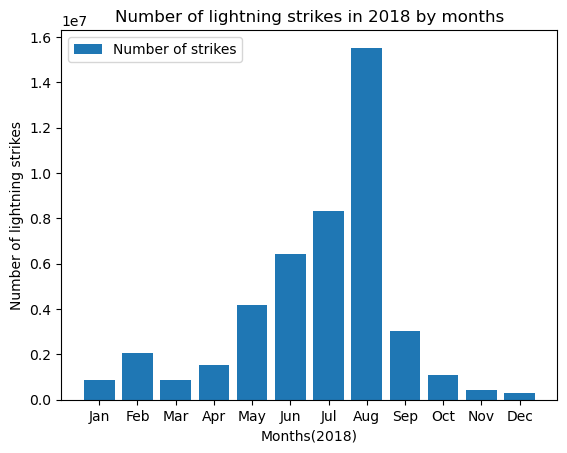

In [30]:
plt.bar(x=df_by_month['month_txt'],height= df_by_month['number_of_strikes'], label="Number of strikes")
plt.plot()

plt.xlabel("Months(2018)")
plt.ylabel("Number of lightning strikes")
plt.title("Number of lightning strikes in 2018 by months")
plt.legend()
plt.show()

The incidence of lightning strikes in 2018 increased significantly as the temperature started to raise (from May to September), and had a drastic fall in September, when temperatures start to get colder again.

### 3.6. Locations with most strikes in a single day

To identify the locations with the most strikes in a single day, I will sort the `number_of_strikes` column in descending value, or by most to least strikes.

In [11]:
# Sort by number of strikes in descending order.
df.sort_values(by='number_of_strikes', ascending=False).head(10)

date  number_of_strikes  center_point_geom
302758 2018-08-20               2211  POINT(-92.5 35.5)
278383 2018-08-16               2142  POINT(-96.1 36.1)
280830 2018-08-17               2061  POINT(-90.2 36.1)
280453 2018-08-17               2031  POINT(-89.9 35.9)
278382 2018-08-16               1902  POINT(-96.2 36.1)
11517  2018-02-10               1899  POINT(-95.5 28.1)
277506 2018-08-16               1878  POINT(-89.7 31.5)
24906  2018-02-25               1833  POINT(-98.7 28.9)
284320 2018-08-17               1767    POINT(-90.1 36)
24825  2018-02-25               1741      POINT(-98 29)

### 3.7. Locations with most days with at least one lightning strike


To find the number of days that a given geographic location had at least one lightning strike, I will use the `value_counts()` function on the `center_point_geom` column. The logic is that if each row represents a location-day, then counting the number of times each location occurs in the data will give me the number of days that location had lightning. 

In [13]:
# Identify the locations that appear most in the dataset.
df.center_point_geom.value_counts()

center_point_geom
POINT(-81.5 22.5)     108
POINT(-84.1 22.4)     108
POINT(-82.5 22.9)     107
POINT(-82.7 22.9)     107
POINT(-82.5 22.8)     106
                     ... 
POINT(-119.3 35.1)      1
POINT(-119.3 35)        1
POINT(-119.6 35.6)      1
POINT(-119.4 35.6)      1
POINT(-58.5 45.3)       1
Name: count, Length: 170855, dtype: int64

The locations with the most days with lightning strikes had at least one strike on 108 days—nearly one out of every three days of the year. These locations are all rather close to each other geographically.

Now I will examine whether there is an even distribution of values, or whether 108 strikes is an unusually high number of days with lightning strikes. I will use the `value_counts()` function again, but this time I will output the top 20 results. I will also rename the columns and apply a color gradient.

In [14]:
# Identify the top 20 locations with most days of lightning.
df.center_point_geom.value_counts()[:20].rename_axis('unique_values').reset_index(name='counts').style.background_gradient()

###  3.8. Lightning strikes by day of week

One useful grouping is categorizing lightning strikes by day of the week, which will tell me whether any particular day of the week had fewer or more lightning strikes than others. To calculate this, I will take advantage of the fact that the data in the `date` column is of the `datetime` class. Because these entries are datetime objects, I can extract date-related information from them and create new columns.

First, I will create a column called `week` using `dt.isocalendar()` on the `date` column. Because I only want to extract the week number, I will add `.week` to the end. References:https://pandas.pydata.org/pandas-docs/dev/reference/api/pandas.Series.dt.isocalendar.html.

I will also add a `weekday` column using `dt.day_name()`. It extracts the text name of the day for any given datetime date. References: https://pandas.pydata.org/pandas-docs/dev/reference/api/pandas.Series.dt.day_name.html.


In [17]:
# Create two new columns.
df['week'] = df.date.dt.isocalendar().week
df['weekday'] = df.date.dt.day_name()
df.head()

date  number_of_strikes center_point_geom  week    weekday
0 2018-01-03                194     POINT(-75 27)     1  Wednesday
1 2018-01-03                 41   POINT(-78.4 29)     1  Wednesday
2 2018-01-03                 33   POINT(-73.9 27)     1  Wednesday
3 2018-01-03                 38   POINT(-73.8 27)     1  Wednesday
4 2018-01-03                 92     POINT(-79 28)     1  Wednesday

Now, I can calculate the mean number of lightning strikes for each weekday of the year. I will use the `groupby()` function to do this.

In [18]:
# Calculate the mean count of lightning strikes for each weekday.
df[['weekday','number_of_strikes']].groupby(['weekday']).mean()

number_of_strikes
weekday                     
Friday             13.349972
Monday             13.152804
Saturday           12.732694
Sunday             12.324717
Thursday           13.240594
Tuesday            13.813599
Wednesday          13.224568

It seems that Saturday and Sunday have fewer lightning strikes on average than the other five weekdays. I will now plot these values as boxplots to better visualize the distribution.

In [19]:
# Define order of days for the plot.
weekday_order = ['Monday','Tuesday', 'Wednesday', 'Thursday','Friday','Saturday','Sunday']

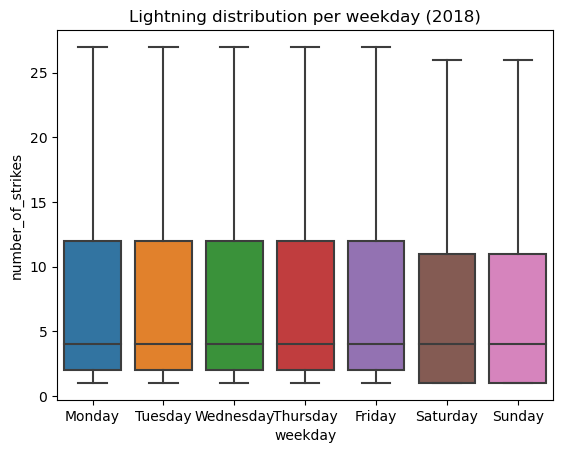

In [22]:
# Creating boxplots of strike counts for each day of week.
g = sns.boxplot(data=df, 
            x='weekday',
            y='number_of_strikes', 
            order=weekday_order, 
            showfliers=False 
            );
g.set_title('Lightning distribution per weekday (2018)');

The median remains the same on all of the days of the week. As for Saturday and Sunday, however, the distributions are *both* lower than they are during the rest of the week. The mean numbers of strikes that occurred on Saturday and Sunday were lower than on the other weekdays. Why might this be? Perhaps the aerosol particles emitted by factories and vehicles increase the likelihood of lightning strikes. In the U.S., Saturday and Sunday are days that many people don't work, so there may be fewer factories operating and fewer cars on the road. This is only speculation, but it's one possible path for further exploration. 

### 3.9. Plotting the number of weekly lightning strikes in 2018

Next, I will plot the number of weekly lightning strikes. I will start by filtering the original dataset to 2018. I will use the `groupby()` and `sum()` functions to get the number of strikes per week.

In [8]:
# Creating a new dataframe view of just 2018 data, summed by week.
df_by_week_2018 = df[df['year'] == '2018'].groupby(['week']).sum(numeric_only=True).reset_index()
df_by_week_2018.head()

week  number_of_strikes
0  2018-W01              34843
1  2018-W02             353425
2  2018-W03              37132
3  2018-W04             412772
4  2018-W05              34972

Now I have a table of exactly what I need to plot the weekly lightning strike totals of 2018. I will use the `plt.bar()` function to plot the bar graph. Within the argument field, I'll input the x-axis (the `week` column), then input the y-axis (or height) as the `number_of_strikes` column. 

I will use `plt.xlabel()`, `plt.ylabel()`, and `plt.title()` to add appropriate text to the graph.

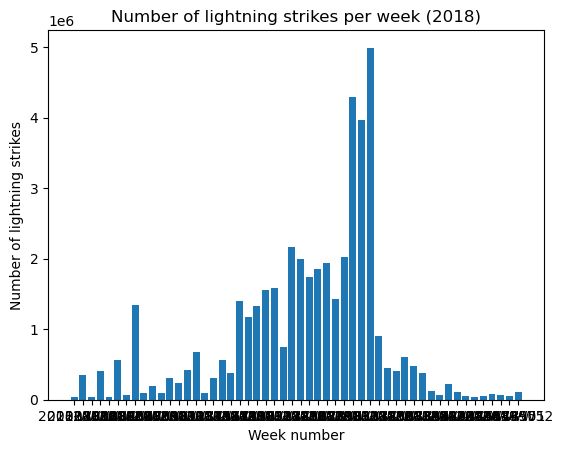

In [9]:
# Plotting a bar graph of weekly strike totals in 2018.
plt.bar(x = df_by_week_2018['week'], height = df_by_week_2018['number_of_strikes'])
plt.plot()
plt.xlabel("Week number")
plt.ylabel("Number of lightning strikes")
plt.title("Number of lightning strikes per week (2018)");

I now have a graph, but I can't read the x-axis labels. To fix this problem, first I will make it bigger by using `plt.figure(figsize=(20, 5))`. This will change the size to 20 inches wide by 5 inches tall.

Next, I will use the `plt.xticks()` function to access the tick labels on the x-axis. Using the `rotation` and `fontsize` keyword arguments, rotate the labels and make the font smaller.

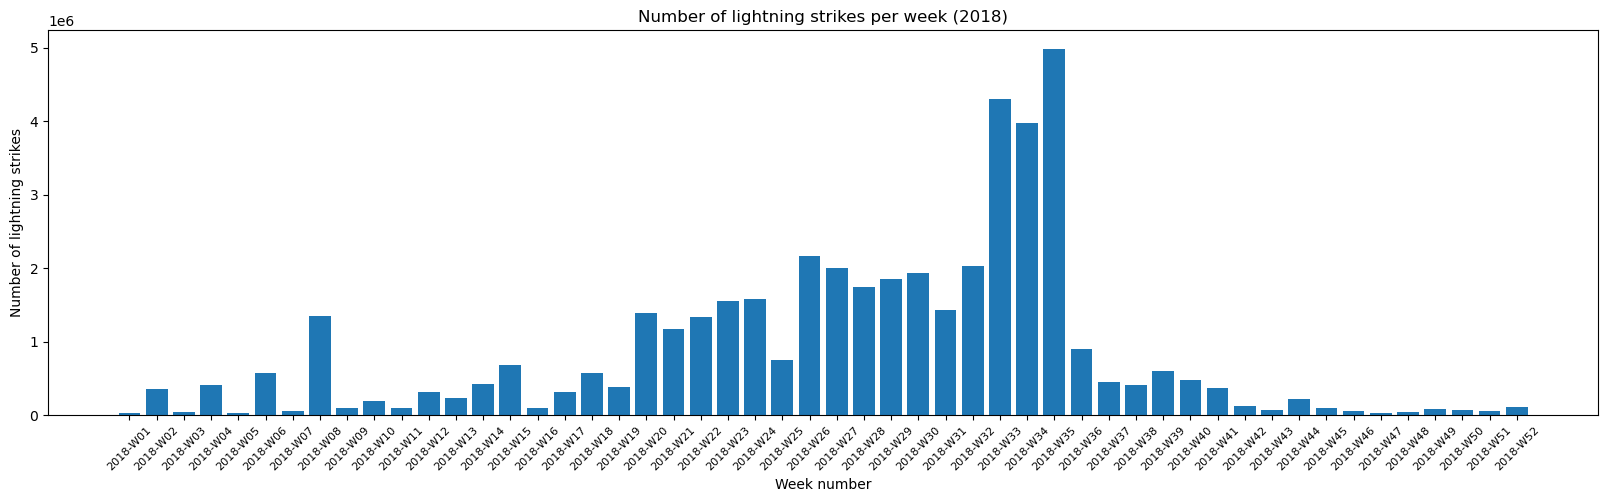

In [10]:
plt.figure(figsize = (20, 5)) # Increase output size.
plt.bar(x = df_by_week_2018['week'], height = df_by_week_2018['number_of_strikes'])
plt.plot()
plt.xlabel("Week number")
plt.ylabel("Number of lightning strikes")
plt.title("Number of lightning strikes per week (2018)")
plt.xticks(rotation = 45, fontsize = 8) # Rotate x-axis labels and decrease font size.

plt.show()

### 3.10. Input Validation

In [23]:
df.head()

date  number_of_strikes center_point_geom
0  2018-01-03                194     POINT(-75 27)
1  2018-01-03                 41   POINT(-78.4 29)
2  2018-01-03                 33   POINT(-73.9 27)
3  2018-01-03                 38   POINT(-73.8 27)
4  2018-01-03                 92     POINT(-79 28)

In [24]:
# Display the data types of the columns
print(df.dtypes)

date                 object
number_of_strikes     int64
center_point_geom    object
dtype: object


Now we'll do some data validation. We begin by counting the number of missing values in each column.

In [25]:
df.isnull().sum()

date                 0
number_of_strikes    0
center_point_geom    0
dtype: int64

Check ranges for all variables.

In [26]:
df.describe(include = 'all')

date  number_of_strikes  center_point_geom
count      3401012       3.401012e+06            3401012
unique         357                NaN             170855
top     2018-09-01                NaN  POINT(-81.5 22.5)
freq         31773                NaN                108
mean           NaN       1.311403e+01                NaN
std            NaN       3.212099e+01                NaN
min            NaN       1.000000e+00                NaN
25%            NaN       2.000000e+00                NaN
50%            NaN       4.000000e+00                NaN
75%            NaN       1.200000e+01                NaN
max            NaN       2.211000e+03                NaN

Notice that the number of unique dates in the `date` column is 357. This means that eight days of 2018 are missing from the data, because 2018 had 365 days.

In [27]:
# Convert `date` column to datetime
df['date'] = pd.to_datetime(df['date'])

### 3.11. Validating `date` column

We need a way to easily determine which dates are missing. We can do this by comparing all of the actual dates in 2018 to the dates we have in our `date` column. The function `pd.date_range()` will create a datetime index of all dates between a start and end date (inclusive) that we'll give as arguments. This is a very useful function that can be used for more than just days. For more information about `pd.date_range()`, refer to the [pandas date_range() function documentation](https://pandas.pydata.org/docs/reference/api/pandas.date_range.html). 

Once we have the datetime index object of all dates in 2018, we'll compare its contents to the dates we have in the `date` column. The `index.difference()` method is used on index objects. Its argument is an index or array that you want to compare with the one the method is being applied to. It returns the set difference of the two indices&mdash;the values that are in the original index but not in the one given in the argument. 

In [28]:
# Create datetime index of every date in 2018
full_date_range = pd.date_range(start='2018-01-01', end='2018-12-31')

# Determine which values are in `full_date_range` but not in `df['date']`
full_date_range.difference(df['date'])

DatetimeIndex(['2018-06-19', '2018-06-20', '2018-06-21', '2018-06-22',
               '2018-09-18', '2018-09-19', '2018-12-01', '2018-12-02'],
              dtype='datetime64[ns]', freq=None)

We knew that the data was missing eight dates, but now we know which specific dates they are. 

### 3.12. Validating `number_of_strikes` column

Let's make a boxplot to better understand the range of values in the data.

<Axes: ylabel='number_of_strikes'>

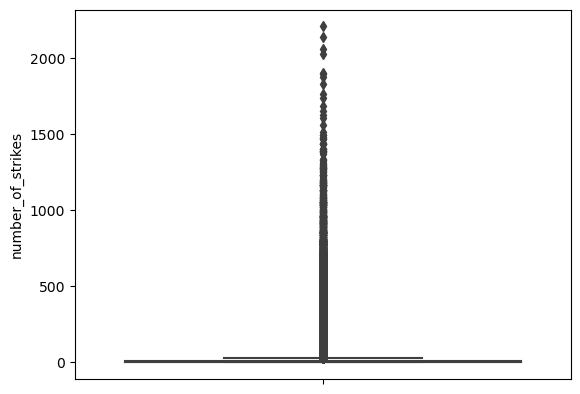

In [29]:
sns.boxplot(y = df['number_of_strikes'])

This is not a very useful visualization because the box of the interquartile range is squished at the very bottom. This is because the upper outliers are taking up all the space. Let's do it again, only this time we'll set `showfliers=False` so outliers are not included. 

<Axes: ylabel='number_of_strikes'>

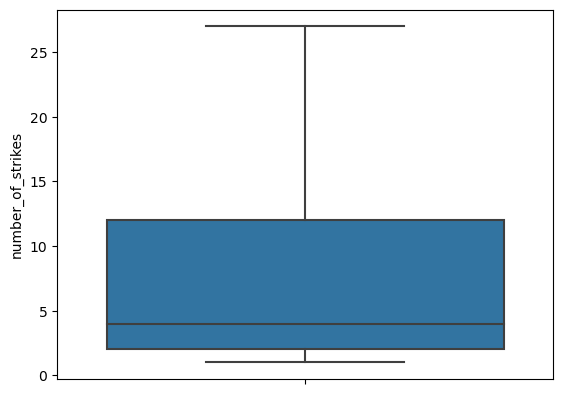

In [31]:
sns.boxplot(y = df['number_of_strikes'], showfliers=False)

Much better! The interquartile range is approximately 2&ndash;12 strikes. But I know from the previous boxplot that there are many outlier days that have hundreds or even thousands of strikes. This just helped me make sure that most of the dates in the data had plausible values for number of strikes. 

### 3.13. Validating `center_point_geom` column

Finally, I'll create a scatterplot of all the geographical coordinates that had lightning strikes in 2018. I'll plot the points on a map to make sure the points in the data are relevant and not in unexpected locations. Because this can be a computationally intensive process, I'll prevent redundant computation by dropping rows that have the same values in their `latitude` and `longitude` columns. I can do this because the purpose here is to examine locations that had lightning strikes, but it doesn't matter how many strikes they had or when.

In [36]:
# Extract latitude and longitude values from center_point_geom variable
def extract_coordinates(point_str):
  coordinates = point_str.split("(")[1].split(")")[0].split(" ")
  return float(coordinates[0]), float(coordinates[1])

df[['longitude', 'latitude']] = df['center_point_geom'].apply(extract_coordinates).tolist()
df.head()

date  number_of_strikes center_point_geom  latitude  longitude
0 2018-01-03                194     POINT(-75 27)      27.0      -75.0
1 2018-01-03                 41   POINT(-78.4 29)      29.0      -78.4
2 2018-01-03                 33   POINT(-73.9 27)      27.0      -73.9
3 2018-01-03                 38   POINT(-73.8 27)      27.0      -73.8
4 2018-01-03                 92     POINT(-79 28)      28.0      -79.0

In [37]:
# Create new df only of unique latitude and longitude combinations
df_points = df[['latitude', 'longitude']].drop_duplicates() 
df_points.head()

latitude  longitude
0      27.0      -75.0
1      29.0      -78.4
2      27.0      -73.9
3      27.0      -73.8
4      28.0      -79.0

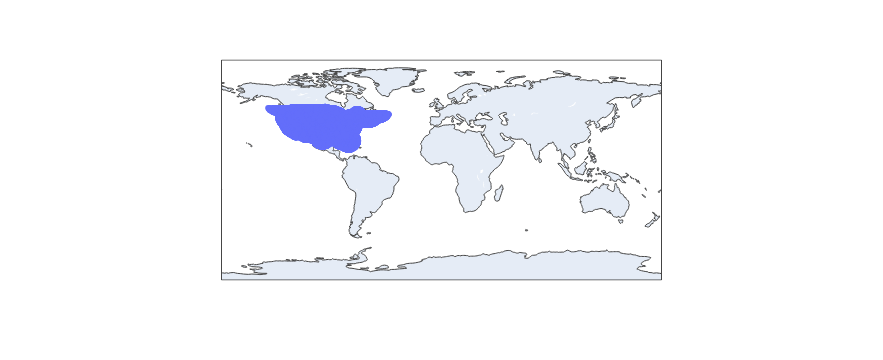

In [38]:
p = px.scatter_geo(df_points, lat = 'latitude', lon = 'longitude')
p.show()

The plot indicates that the lightning strikes occurred primarily in the United States, but there were also many strikes in southern Canada, Mexico, and the Caribbean.